In [4]:
#libraries

import numpy as np
import pandas as pd 
import os


In [5]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
len(bank)


41188

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
print(bank['job'].unique())
print(bank['marital'].unique())
print(bank['education'].unique())
print(bank['housing'].unique())
print(bank['loan'].unique())
print(bank['contact'].unique())
print(bank['month'].unique())
print(bank['day_of_week'].unique())
print(bank['campaign'].unique())


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


In [10]:
print('Min age: ', bank['age'].max())
print('Max age: ', bank['age'].min())
bank.isnull().any()


Min age:  98
Max age:  17


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

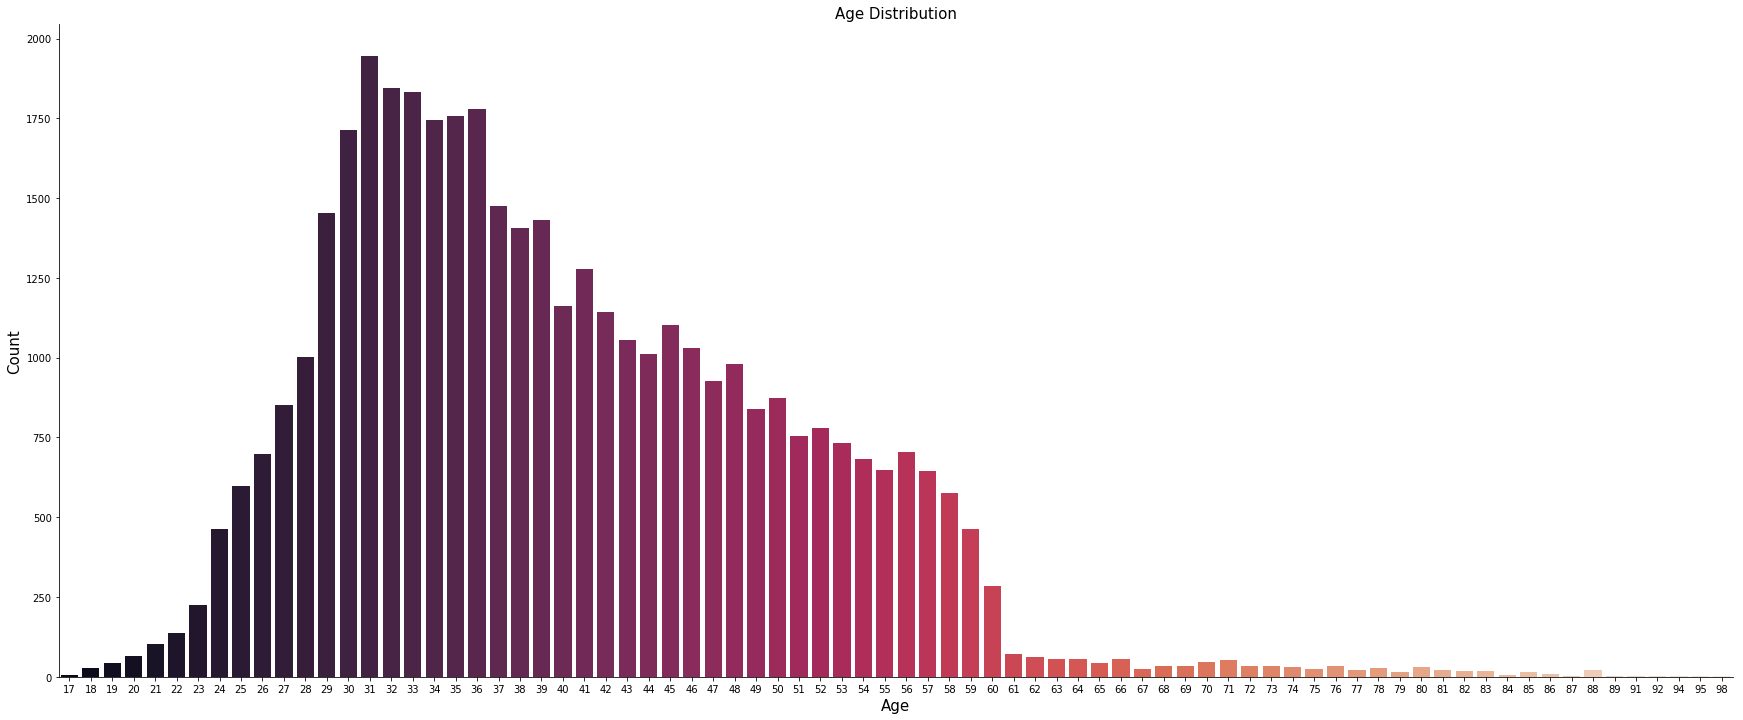

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

In [13]:
### finding outliers based on age
# Method 1- Z score
threshold = 3
ys= bank['age']
mean_y = np.mean(ys)
stdev_y = np.std(ys)
fence_low  = mean_y-3*stdev_y
fence_high = mean_y+3*stdev_y
bank1= bank.loc[(bank['age'] > fence_low) & (bank['age'] < fence_high)]
print('Zscore lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')


# Method 2- IQR method
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier(bank, 'age')

# we will use IQR here

Zscore lower bound and upper bound are 8.760689990426734 and 71.28743082146022 respectively
IQR lower bound and upper bound are 9.5 and 69.5 respectively


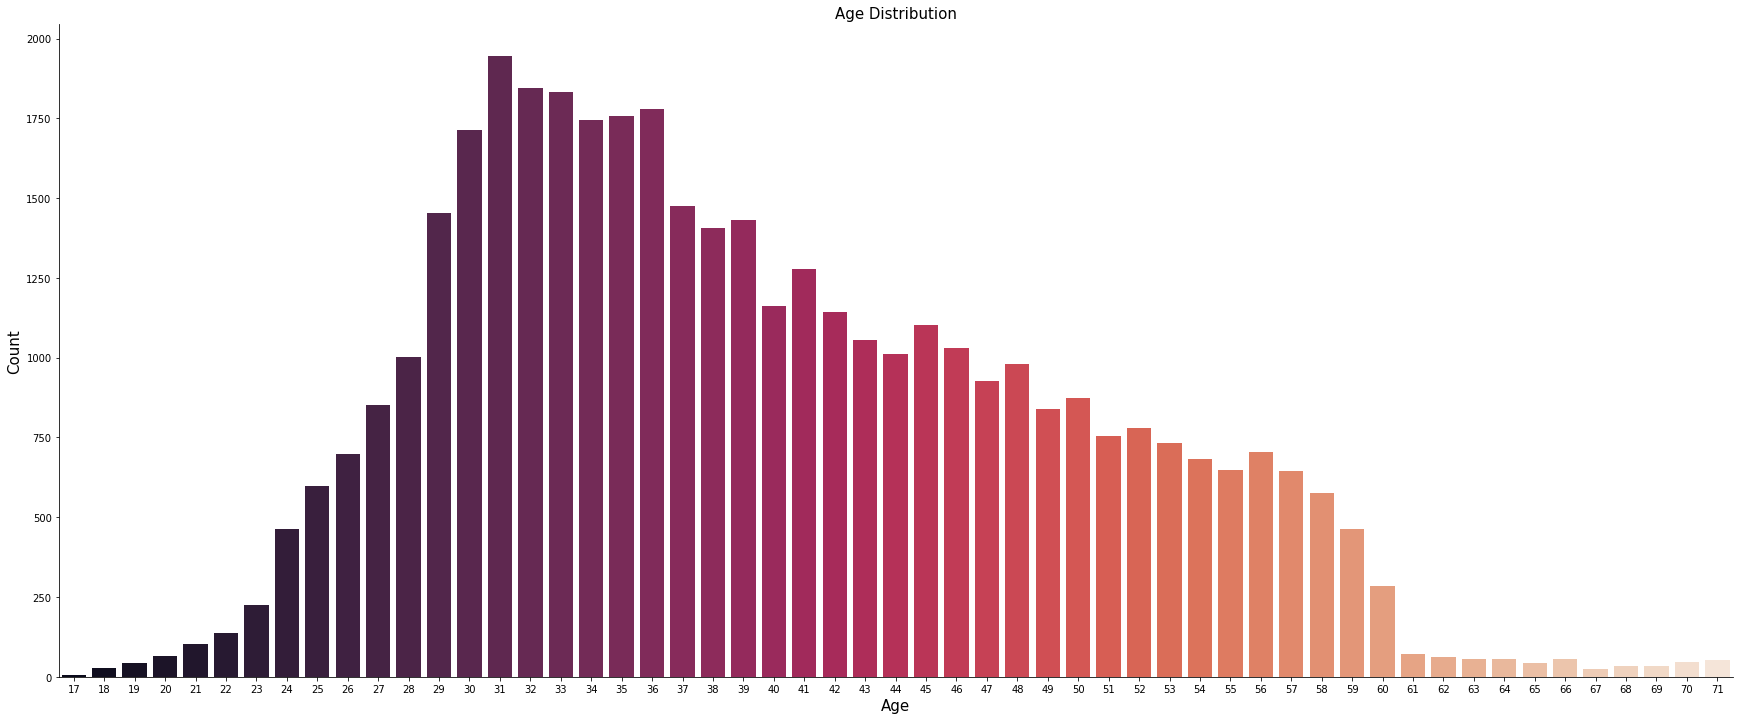

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = bank1)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()


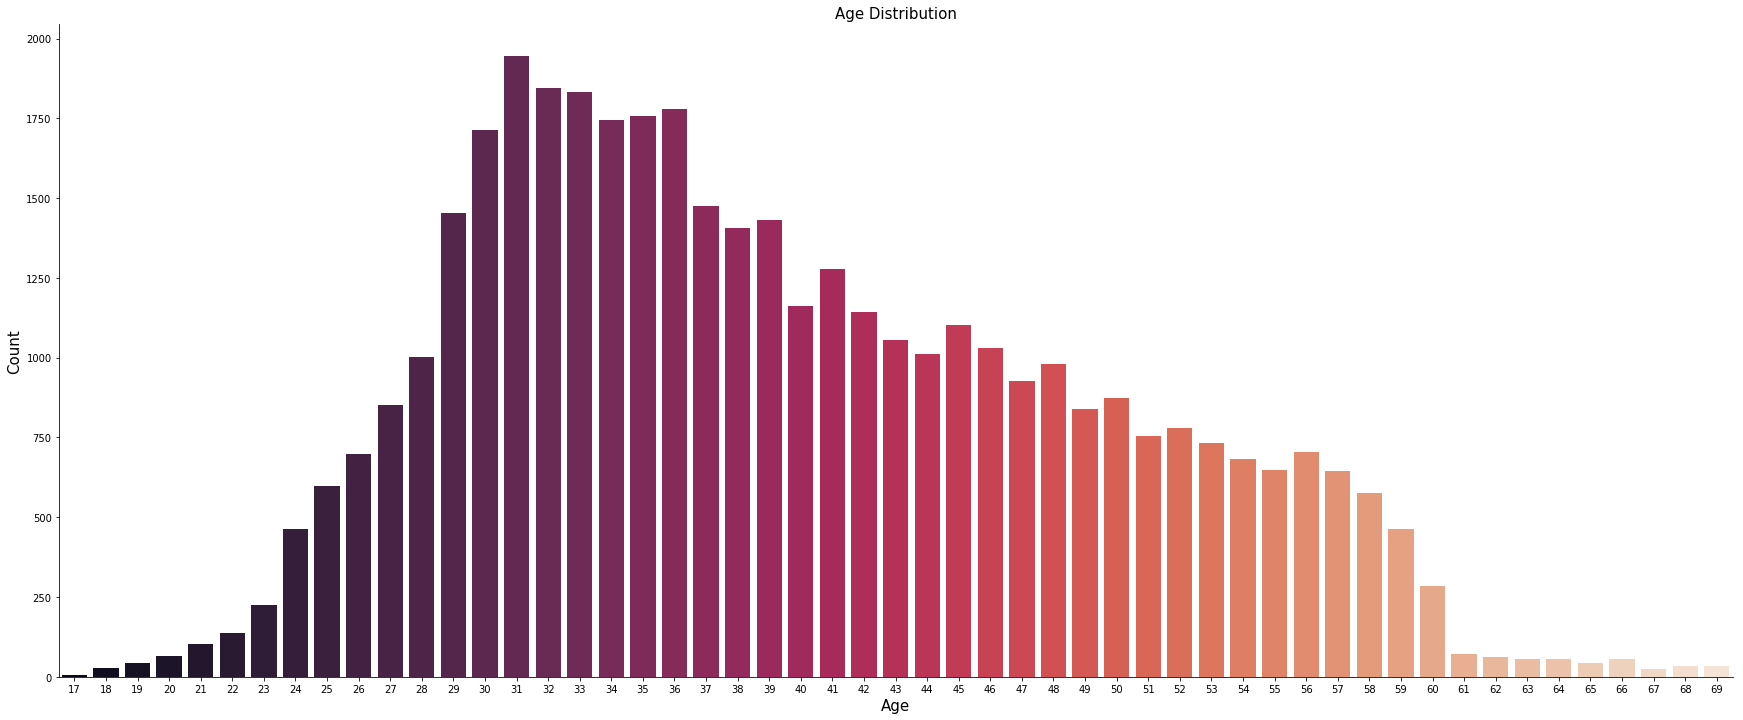

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = bank2)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()


In [16]:

#function to creat group of ages, this helps because we have 78 differente values here
bank2= bank2.copy()
def age(dataframe):
    q1 = dataframe['age'].quantile(0.25)
    q2 = dataframe['age'].quantile(0.50)
    q3 = dataframe['age'].quantile(0.75)
    dataframe.loc[(dataframe['age'] <= q1), 'age'] = 1
    dataframe.loc[(dataframe['age'] > q1) & (dataframe['age'] <= q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] > q2) & (dataframe['age'] <= q3), 'age'] = 3
    dataframe.loc[(dataframe['age'] > q3), 'age'] = 4 
    print (q1, q2, q3)
    return dataframe
age(bank2);

bank2.head(10)

32.0 38.0 47.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


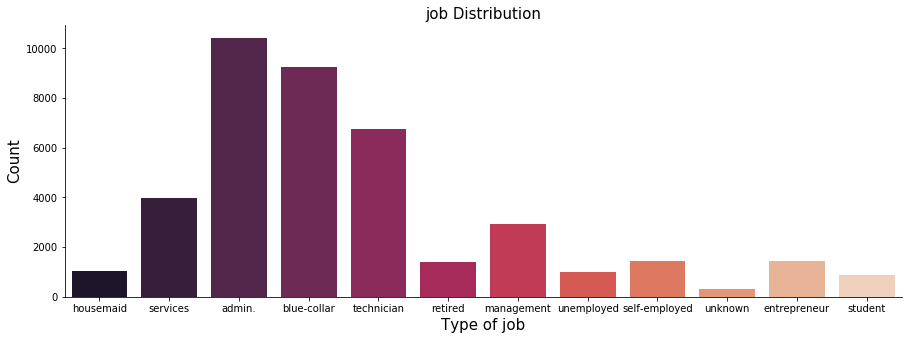

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job',  palette="rocket", data = bank1)
ax.set_xlabel('Type of job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('job Distribution', fontsize=15)
sns.despine()

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()


In [19]:
labelencoder_X = LabelEncoder()

In [20]:
labelencoder_X.fit(bank2['job'])
bank2['job'] = labelencoder_X.transform(bank2['job'])
bank2.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


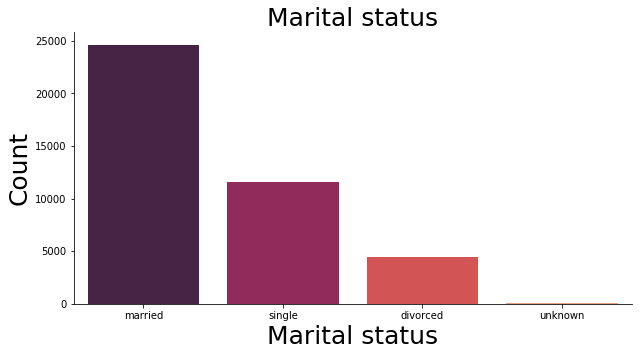

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital',  palette="rocket", data = bank2)
ax.set_xlabel('Marital status', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Marital status', fontsize=25)
sns.despine()

In [22]:
labelencoder_X.fit(bank2['marital'])
bank2['marital'] = labelencoder_X.transform(bank2['marital'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,1,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,1,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,1,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


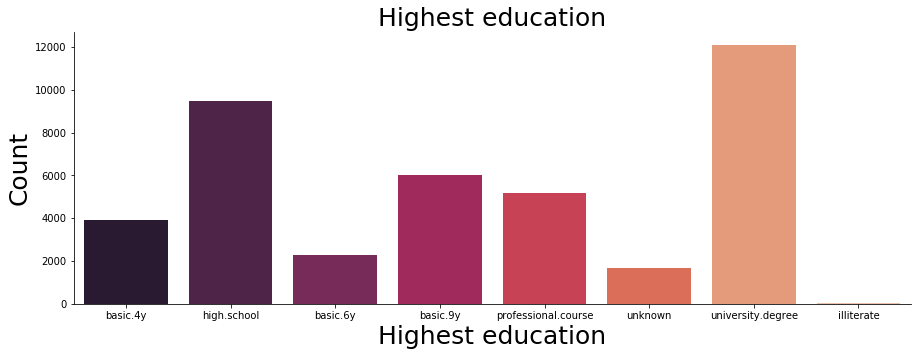

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education',  palette="rocket", data = bank2)
ax.set_xlabel('Highest education', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Highest education', fontsize=25)
sns.despine()

In [24]:
labelencoder_X.fit(bank2['education'])
bank2['education'] = labelencoder_X.transform(bank2['education'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,1,2,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,1,5,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,1,7,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


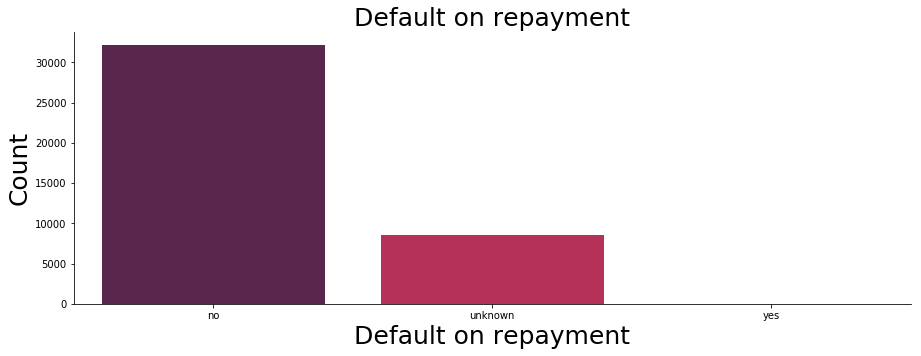

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'default',  palette="rocket", data = bank2)
ax.set_xlabel('Default on repayment', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Default on repayment', fontsize=25)
sns.despine()

In [26]:
labelencoder_X.fit(bank2['default'])
bank2['default'] = labelencoder_X.transform(bank2['default'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,1,2,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,1,5,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,1,7,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


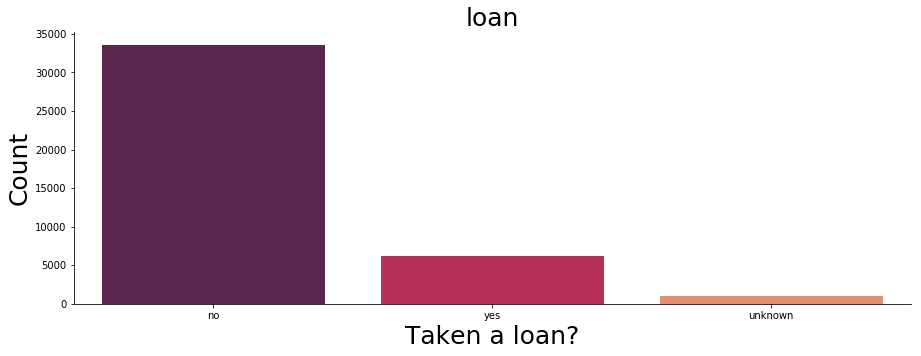

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'loan',  palette="rocket", data = bank2)
ax.set_xlabel('Taken a loan?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('loan', fontsize=25)
sns.despine()

In [28]:
labelencoder_X.fit(bank2['loan'])
bank2['loan'] = labelencoder_X.transform(bank2['loan'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,yes,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,no,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,1,2,1,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,1,5,0,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,1,7,1,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,yes,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,yes,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


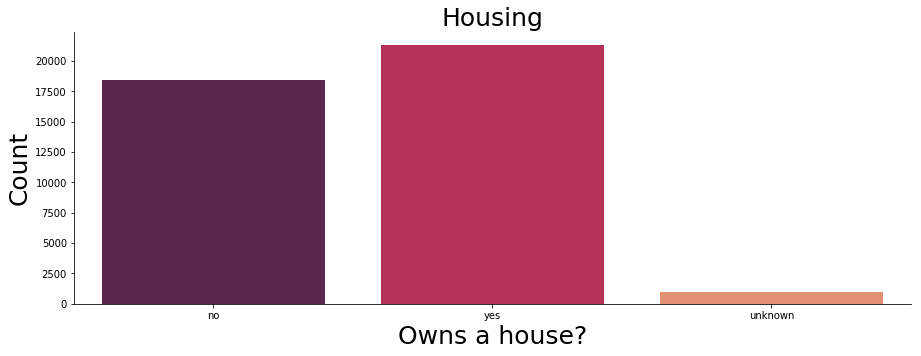

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'housing',  palette="rocket", data = bank2)
ax.set_xlabel('Owns a house?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Housing', fontsize=25)
sns.despine()

In [30]:
labelencoder_X.fit(bank2['housing'])
bank2['housing'] = labelencoder_X.transform(bank2['housing'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,1,2,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,1,5,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,1,7,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


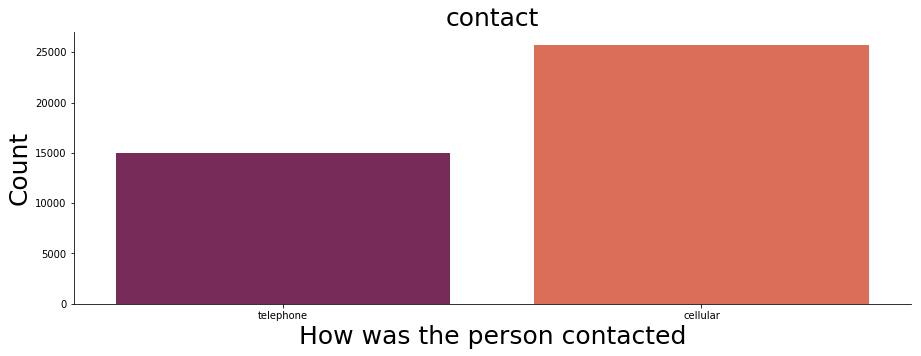

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'contact',  palette="rocket", data = bank2)
ax.set_xlabel('How was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('contact', fontsize=25)
sns.despine()

In [32]:
labelencoder_X.fit(bank2['contact'])
bank2['contact'] = labelencoder_X.transform(bank2['contact'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,0,2,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,7,1,2,1,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,0,1,5,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,1,1,7,1,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


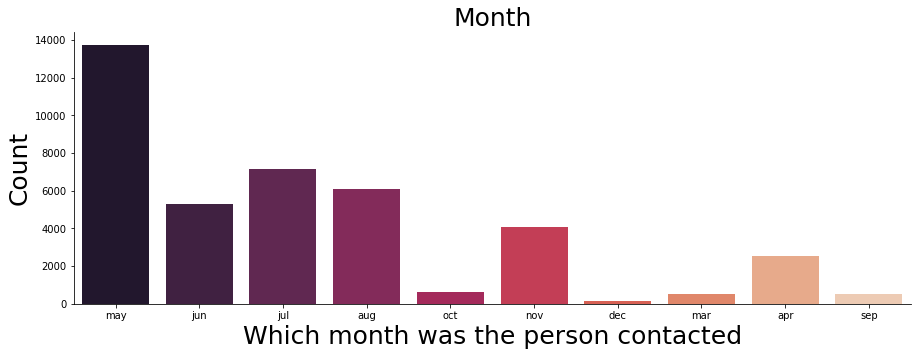

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'month',  palette="rocket", data = bank2)
ax.set_xlabel('Which month was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Month', fontsize=25)
sns.despine()

In [34]:
labelencoder_X.fit(bank2['month'])
bank2['month'] = labelencoder_X.transform(bank2['month'])
bank2.tail(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41166,1,0,1,6,0,0,0,1,7,wed,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41167,1,0,1,6,0,2,0,0,7,wed,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41168,2,2,1,6,0,0,0,0,7,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,4,7,1,3,0,2,0,0,7,wed,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,3,4,0,6,0,2,0,0,7,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,2,8,1,5,0,2,0,1,7,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,1,0,2,6,0,2,0,0,7,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,4,5,1,6,0,2,0,0,7,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,4,5,1,6,0,2,0,0,7,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,2,8,2,7,0,2,0,0,7,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


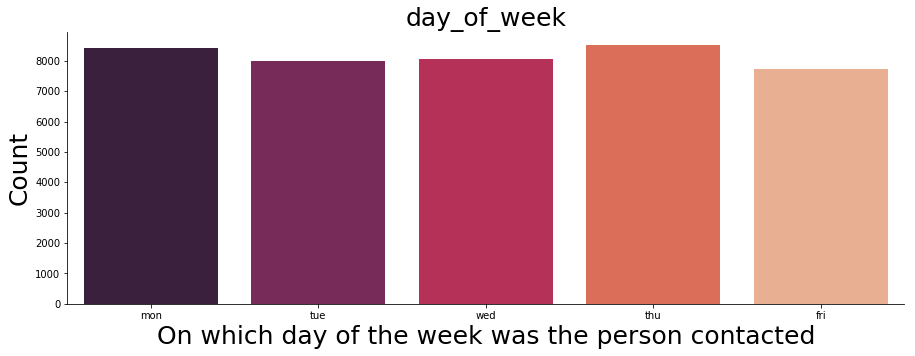

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'day_of_week',  palette="rocket", data = bank2)
ax.set_xlabel('On which day of the week was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('day_of_week', fontsize=25)
sns.despine()

In [36]:
labelencoder_X.fit(bank2['day_of_week'])
bank2['day_of_week'] = labelencoder_X.transform(bank2['day_of_week'])
bank2.tail(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41166,1,0,1,6,0,0,0,1,7,4,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41167,1,0,1,6,0,2,0,0,7,4,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41168,2,2,1,6,0,0,0,0,7,4,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,4,7,1,3,0,2,0,0,7,4,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,3,4,0,6,0,2,0,0,7,4,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,2,8,1,5,0,2,0,1,7,2,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,1,0,2,6,0,2,0,0,7,2,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,4,5,1,6,0,2,0,0,7,2,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,4,5,1,6,0,2,0,0,7,2,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,2,8,2,7,0,2,0,0,7,2,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


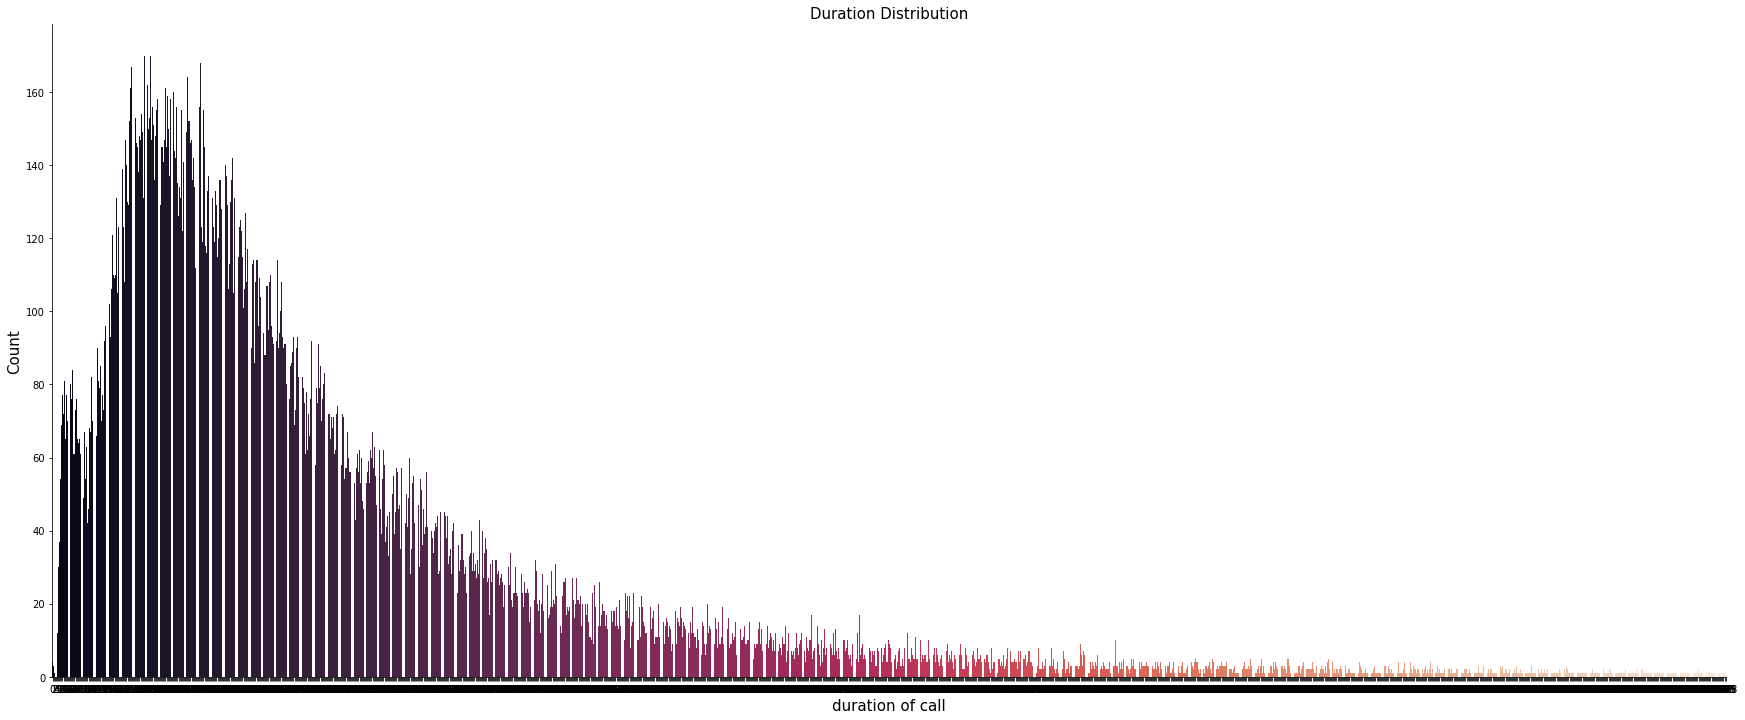

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'duration',  palette="rocket", data = bank)
ax.set_xlabel('duration of call', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

In [38]:
def remove_outlier_upper(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier_upper(bank2, 'duration')

IQR lower bound and upper bound are 0 and 644.5 respectively


In [39]:
bank2['duration'].head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

In [40]:
#function to creat group of duration, this helps because we a lot of values
bank2= bank2.copy()
def duration(dataframe):
    q1 = dataframe['duration'].quantile(0.25)
    q2 = dataframe['duration'].quantile(0.50)
    q3 = dataframe['duration'].quantile(0.75)
    dataframe.loc[(dataframe['duration'] <= q1), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > q1) & (dataframe['duration'] <= q2), 'duration'] = 2
    dataframe.loc[(dataframe['duration'] > q2) & (dataframe['duration'] <= q3), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > q3), 'duration'] = 4 
    print (q1, q2, q3)
    return dataframe
duration(bank2)

bank2['duration'].head(10)

97.0 166.0 277.0


0    3
1    2
2    3
3    2
4    4
5    3
6    2
7    3
8    4
9    1
Name: duration, dtype: int64

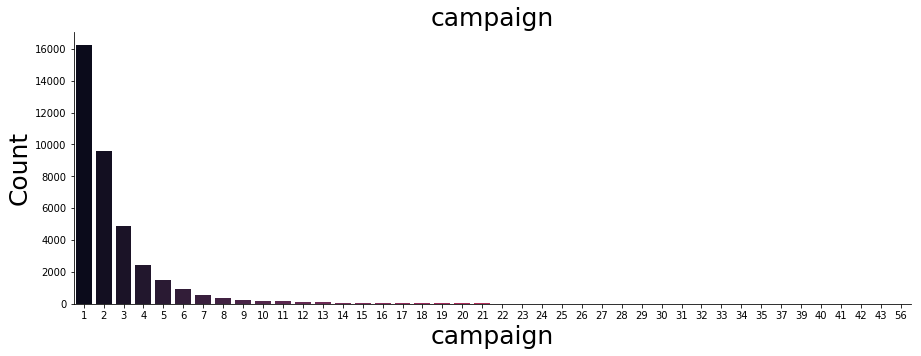

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'campaign',  palette="rocket", data = bank2)
ax.set_xlabel('campaign', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('campaign', fontsize=25)
sns.despine()

In [42]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier(bank2, 'campaign')

IQR lower bound and upper bound are 0 and 6.0 respectively


In [43]:
len(bank2)

34631

In [44]:
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
bank2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [46]:
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
print(bank2['pdays'].unique())


[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  27  20  19]


In [48]:
bank2.loc[(bank2['pdays'] == 999), 'pdays'] = 1
bank2.loc[(bank2['pdays'] > 0) & (bank2['pdays'] <= 10), 'pdays'] = 2
bank2.loc[(bank2['pdays'] > 10) & (bank2['pdays'] <= 20), 'pdays'] = 3
bank2.loc[(bank2['pdays'] > 20) & (bank2['pdays'] != 999), 'pdays'] = 4 
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,0,2,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
print(bank2['emp.var.rate'].unique())

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


In [51]:
print(bank2['cons.price.idx'].unique())

[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]


In [50]:
print(bank2['cons.conf.idx'].unique())

[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]


In [52]:
print(bank2['euribor3m'].unique())

[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.927 0.921 0.914 0.908 0.899 0.884 0.883 0.881
 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843 0.838 0.834 0.829
 0.825 0.821 0.819 0.813 0.809 0.803 0.797 0.788 0.781 

In [53]:
bank2.loc[(bank2['euribor3m'] < 1), 'euribor3m'] = 1
bank2.loc[(bank2['euribor3m'] > 1) & (bank2['euribor3m'] <= 2), 'euribor3m'] = 2
bank2.loc[(bank2['euribor3m'] > 2) & (bank2['euribor3m'] <= 3), 'euribor3m'] = 3
bank2.loc[(bank2['euribor3m'] > 3) & (bank2['euribor3m'] <= 4), 'euribor3m'] = 4
bank2.loc[(bank2['euribor3m'] > 4), 'euribor3m'] = 5
bank2.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
1,4,7,1,3,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
3,3,0,1,1,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
4,4,7,1,3,0,0,2,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
5,3,7,1,2,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
6,4,0,1,5,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
7,3,1,1,7,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
8,1,9,2,5,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no


In [54]:
bank_final= bank2.copy()
y = bank_final['y']
bank_final.drop(['y'],axis=1,inplace=True)
bank_final.shape

(34631, 20)

In [55]:
# Now lets start applying different models on our data
bank_final.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,4,3,1,0,0,0,0,1,6,1,3,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
1,4,7,1,3,1,0,0,1,6,1,2,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
2,2,7,1,3,0,2,0,1,6,1,3,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
3,3,0,1,1,0,0,0,1,6,1,2,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
4,4,7,1,3,0,0,2,1,6,1,4,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.25, random_state = 0)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# Lets first standardize our data i.e. transform the data in a way that the variance is unitary and that the mean of the series is 0.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# 1. KNN classifier
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %f" % (k_value, scores.mean()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %f" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(accuracy_score(y_test, knnpred)*100)

In [ ]:
# 2. Logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(accuracy_score(y_test, logpred)*100)

In [ ]:
# 3. Linear classifiers: Support Vector Machines (kernel: sigmoid)

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'sigmoid', gamma= this_gamma)
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    print(accuracy_score(y_test, svcpred)*100)

In [ ]:
# 4. Linear classifiers: Support Vector Machines (kernel: Radial Basis Function)

from sklearn.svm import SVC
for this_gamma in [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1, 1.0, 10.0]:
    svc= SVC(kernel = 'rbf', gamma= this_gamma)
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    print(this_gamma, accuracy_score(y_test, svcpred)*100)

In [ ]:
# 5. Linear classifiers: Support Vector Machines (kernel: Linear)

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'linear', gamma= this_gamma)
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    print(accuracy_score(y_test, svcpred)*100)
# So we learned that value of gamma does not affect the accuracy of SVM when using a Linear kernel

In [ ]:
# 6. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(accuracy_score(y_test, dtreepred)*100)

In [ ]:
# 7. Random Forest Classifier(n=200)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(accuracy_score(y_test, rfcpred)*100)

In [ ]:
# 8. Random Forest Classifier(n=1000)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(accuracy_score(y_test, rfcpred)*100)

In [ ]:
# 9. naive bayes classifier

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(accuracy_score(y_test, gaussiannbpred)*100)


In [ ]:
# 10. Gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)

print(accuracy_score(y_test, gbkpred)*100)

In [ ]:
# 11. XGBoost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(accuracy_score(y_test, xgbprd)*100)

In [ ]:
# Now lets find the cross validation scores for top 2 classifiers-
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())
print(GBKCV,XGB)